# Flight Price Prediction
---

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importing dataset

In [192]:
train_data = pd.read_csv('Train_1.csv')
test_data = pd.read_csv('Test_1.csv')

In [193]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,09-04-2019,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,No info,3943.0
1,IndiGo,03-06-2019,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,No info,4823.0
2,Jet Airways,09-06-2019,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,In-flight meal not included,3210.0
3,Multiple carriers,27-05-2019,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,No info,7005.0
4,Air India,06-06-2019,Delhi,Cochin,06:50,07-06-2021 07:40,24h 50m,2 stops,No info,13381.0


In [194]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,SpiceJet,12-05-2019,Kolkata,Banglore,15:05,20:20,5h 15m,1 stop,No info
1,Air India,15-03-2019,Delhi,Cochin,18:05,21:10,3h 5m,non-stop,No info
2,Jet Airways,24-06-2019,Delhi,Cochin,11:45,25-06-2021 04:25,16h 40m,2 stops,No info
3,SpiceJet,21-06-2019,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,No info
4,IndiGo,27-04-2019,Kolkata,Banglore,14:25,16:55,2h 30m,non-stop,No info


In [195]:
train_data.Duration.value_counts()

2h 50m     432
1h 30m     312
2h 55m     282
2h 35m     271
2h 45m     263
          ... 
32h 20m      1
30h 25m      1
29h 10m      1
47h 40m      1
42h 45m      1
Name: Duration, Length: 364, dtype: int64

In [196]:
train_data.dropna(inplace = True)

In [197]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

## EDA & PREPROCESSING

In [198]:
# Extracting Day from Journey_date
train_data["day_of_journey"] = pd.to_datetime(train_data.Date_of_Journey, format="%d-%m-%Y").dt.day

In [199]:
# Extracting Date from Journey_date
train_data["Jmonth_of_journey"] = pd.to_datetime(train_data.Date_of_Journey, format = "%d-%m-%Y").dt.month

<AxesSubplot:xlabel='Jmonth_of_journey', ylabel='Price'>

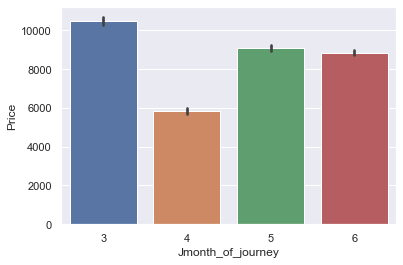

In [200]:
#Price vs Month of journey
sns.barplot(x="Jmonth_of_journey",y="Price",data=train_data)

<AxesSubplot:xlabel='day_of_journey', ylabel='count'>

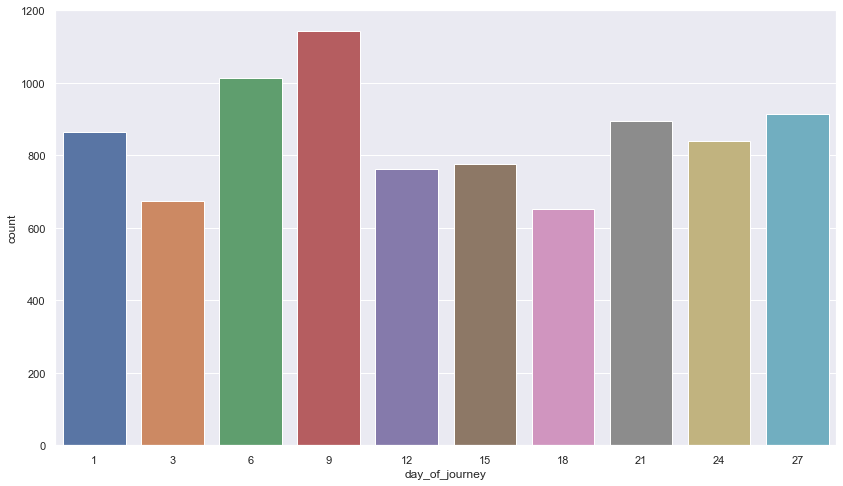

In [201]:
# Day of journey vs Price
plt.figure(figsize=(14,8))
sns.countplot(x='day_of_journey',data=train_data)

In [202]:
# Droping date  of journey as we already extracted essential things from that
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [203]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Departure_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Departure_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [204]:
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [205]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day_of_journey,Jmonth_of_journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,2h 50m,non-stop,No info,3943.0,9,4,4,0,6,50
1,IndiGo,Banglore,Delhi,2h 50m,non-stop,No info,4823.0,3,6,8,30,11,20
2,Jet Airways,Mumbai,Hyderabad,1h 30m,non-stop,In-flight meal not included,3210.0,9,6,19,35,21,5
3,Multiple carriers,Delhi,Cochin,8h 10m,1 stop,No info,7005.0,27,5,12,50,21,0
4,Air India,Delhi,Cochin,24h 50m,2 stops,No info,13381.0,6,6,6,50,7,40


In [206]:
# Function to fing convert duration into hour and minutes 
total_duration = list(train_data["Duration"])

for i in range(len(total_duration)):
    if len(total_duration[i].split()) != 2:
        if "h" in total_duration[i]:
            total_duration[i] = total_duration[i].strip() + " 0m"
        else:
            total_duration[i] = "0h " + total_duration[i]           
duration_hours = []
duration_mins = []
for i in range(len(total_duration)):
    duration_hours.append(int(total_duration[i].split(sep = "h")[0]))
    duration_mins.append(int(total_duration[i].split(sep = "m")[0].split()[-1]))

In [207]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [208]:
train_data.drop(["Duration"], axis = 1, inplace = True)

### Analyzing Categorical Data

In [209]:
train_data.describe(include=np.object)

,Airline,Source,Destination,Total_Stops,Additional_Info
count,8533,8533,8533,8533,8533
unique,9,5,6,4,9
top,Jet Airways,Delhi,Cochin,1 stop,No info
freq,3073,3619,3619,4490,6684


In [210]:
train_data["Airline"].value_counts()

Jet Airways          3073
IndiGo               1641
Air India            1401
Multiple carriers     953
SpiceJet              654
Vistara               384
Air Asia              256
GoAir                 157
OTHERS                 14
Name: Airline, dtype: int64

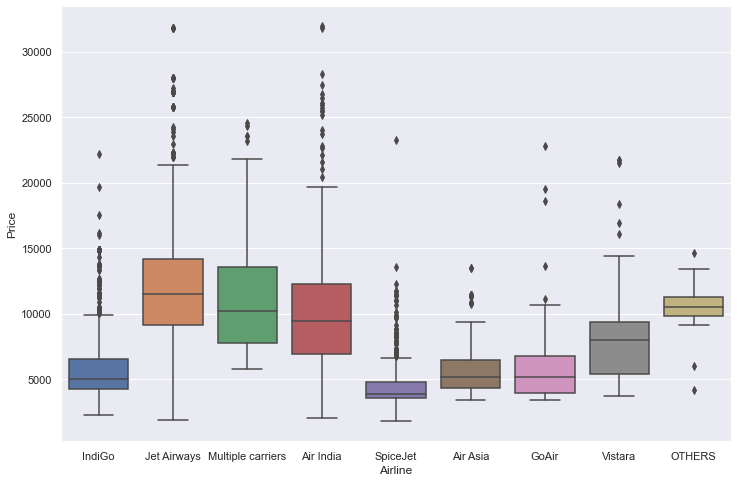

In [211]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
plt.figure(figsize=(12,8))
sns.boxplot(y = "Price", x = "Airline", data = train_data,)
plt.show()

In [212]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = pd.get_dummies(train_data["Airline"], drop_first= True)

In [213]:
train_data["Source"].value_counts()

Delhi       3619
Kolkata     2291
Banglore    1748
Mumbai       566
Chennai      309
Name: Source, dtype: int64

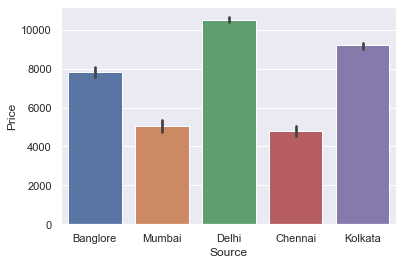

In [214]:
# Source vs Price

sns.barplot(y = "Price", x = "Source", data = train_data)
plt.show()

In [215]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = pd.get_dummies(train_data["Source"], drop_first= True)

In [216]:
train_data["Destination"].value_counts()

Cochin       3619
Banglore     2291
Delhi        1018
New Delhi     730
Hyderabad     566
Kolkata       309
Name: Destination, dtype: int64

In [217]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(train_data["Destination"], drop_first = True)

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

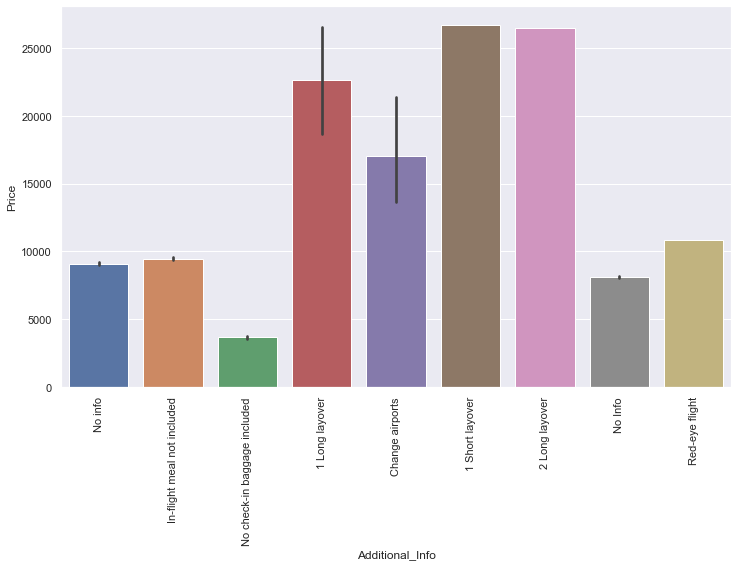

In [218]:
# Visualizing additional information
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(x='Additional_Info',y='Price',data=train_data)

In [219]:
#As Additionl_info is Nominal Categorical data we will perform OneHotEncoding
Additional_Info = pd.get_dummies(train_data['Additional_Info'], drop_first= True)

In [220]:
train_data["Total_Stops"].value_counts()

1 stop          4490
non-stop        2793
2 stops         1214
3 or 4 stops      36
Name: Total_Stops, dtype: int64

In [221]:
# As this is case of Ordinal Categorical type we perform Label Encoder

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 or 4 stops": 3}, inplace = True)

In [222]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day_of_journey,Jmonth_of_journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,No info,3943.0,9,4,4,0,6,50,2,50
1,IndiGo,Banglore,Delhi,0,No info,4823.0,3,6,8,30,11,20,2,50
2,Jet Airways,Mumbai,Hyderabad,0,In-flight meal not included,3210.0,9,6,19,35,21,5,1,30
3,Multiple carriers,Delhi,Cochin,1,No info,7005.0,27,5,12,50,21,0,8,10
4,Air India,Delhi,Cochin,2,No info,13381.0,6,6,6,50,7,40,24,50


In [223]:
# Concatenate dataframe with extracted information

train_data = pd.concat([train_data, Airline, Source, Destination,Additional_Info], axis = 1)

In [224]:
train_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day_of_journey,Jmonth_of_journey,Departure_hour,Departure_min,...,Kolkata,New Delhi,1 Short layover,2 Long layover,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,IndiGo,Banglore,Delhi,0,No info,3943.0,9,4,4,0,...,0,0,0,0,0,0,0,0,1,0
1,IndiGo,Banglore,Delhi,0,No info,4823.0,3,6,8,30,...,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Mumbai,Hyderabad,0,In-flight meal not included,3210.0,9,6,19,35,...,0,0,0,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,No info,7005.0,27,5,12,50,...,0,0,0,0,0,0,0,0,1,0
4,Air India,Delhi,Cochin,2,No info,13381.0,6,6,6,50,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,Air India,Delhi,Cochin,2,No info,16373.0,9,3,22,0,...,0,0,0,0,0,0,0,0,1,0
8529,Vistara,Banglore,Delhi,0,No info,4878.0,27,5,17,0,...,0,0,0,0,0,0,0,0,1,0
8530,Vistara,Chennai,Kolkata,0,No info,4842.0,24,3,7,5,...,1,0,0,0,0,0,0,0,1,0
8531,Air India,Delhi,Cochin,1,No info,10315.0,9,3,4,0,...,0,0,0,0,0,0,0,0,1,0


In [225]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day_of_journey,Jmonth_of_journey,Departure_hour,Departure_min,...,Kolkata,New Delhi,1 Short layover,2 Long layover,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,IndiGo,Banglore,Delhi,0,No info,3943.0,9,4,4,0,...,0,0,0,0,0,0,0,0,1,0
1,IndiGo,Banglore,Delhi,0,No info,4823.0,3,6,8,30,...,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Mumbai,Hyderabad,0,In-flight meal not included,3210.0,9,6,19,35,...,0,0,0,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,No info,7005.0,27,5,12,50,...,0,0,0,0,0,0,0,0,1,0
4,Air India,Delhi,Cochin,2,No info,13381.0,6,6,6,50,...,0,0,0,0,0,0,0,0,1,0


In [226]:
# Dropping irrelevant and unnecessary columns
train_data.drop(["Airline", "Source", "Destination","Additional_Info"], axis = 1, inplace = True)

In [227]:
train_data.head()

,Total_Stops,Price,day_of_journey,Jmonth_of_journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Kolkata,New Delhi,1 Short layover,2 Long layover,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,0,3943.0,9,4,4,0,6,50,2,50,...,0,0,0,0,0,0,0,0,1,0
1,0,4823.0,3,6,8,30,11,20,2,50,...,0,0,0,0,0,0,0,0,1,0
2,0,3210.0,9,6,19,35,21,5,1,30,...,0,0,0,0,0,1,0,0,0,0
3,1,7005.0,27,5,12,50,21,0,8,10,...,0,0,0,0,0,0,0,0,1,0
4,2,13381.0,6,6,6,50,7,40,24,50,...,0,0,0,0,0,0,0,0,1,0


In [228]:
train_data.shape

(8533, 35)

---

## Test set

- Creating and mapping everything again on Test dataset

In [229]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,SpiceJet,12-05-2019,Kolkata,Banglore,15:05,20:20,5h 15m,1 stop,No info
1,Air India,15-03-2019,Delhi,Cochin,18:05,21:10,3h 5m,non-stop,No info
2,Jet Airways,24-06-2019,Delhi,Cochin,11:45,25-06-2021 04:25,16h 40m,2 stops,No info
3,SpiceJet,21-06-2019,Kolkata,Banglore,09:00,11:25,2h 25m,non-stop,No info
4,IndiGo,27-04-2019,Kolkata,Banglore,14:25,16:55,2h 30m,non-stop,No info


In [230]:
# Date_of_Journey
test_data["day_of_journey"] = pd.to_datetime(test_data.Date_of_Journey, format="%d-%m-%Y").dt.day
test_data["Jmonth_of_journey"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d-%m-%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Departure_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Departure_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Duration Handled here
total_duration = list(test_data["Duration"])

for i in range(len(total_duration)):
    if len(total_duration[i].split()) != 2: 
        if "h" in total_duration[i]:
            total_duration[i] = total_duration[i].strip() + " 0m" 
        else:
            total_duration[i] = "0h " + total_duration[i]

duration_hours = []
duration_mins = []
for i in range(len(total_duration)):
    duration_hours.append(int(total_duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(total_duration[i].split(sep = "m")[0].split()[-1]))


# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

Source = pd.get_dummies(test_data["Source"], drop_first= True)

Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

Additional_Info = pd.get_dummies(test_data['Additional_Info'], drop_first= True)

# Replacing Total_Stops/Label encoding
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 or 4 stops": 3}, inplace = True)

# Concatenate dataframe
test_data = pd.concat([test_data, Airline, Source, Destination,Additional_Info], axis = 1)

#Dropping irrilivant data
test_data.drop(["Airline", "Source", "Destination","Additional_Info"], axis = 1, inplace = True)



In [231]:
test_data.head()

,Total_Stops,day_of_journey,Jmonth_of_journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Delhi,Hyderabad,Kolkata,New Delhi,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info
0,1,12,5,15,5,20,20,5,15,0,...,0,0,0,0,0,0,0,0,0,1
1,0,15,3,18,5,21,10,3,5,1,...,0,0,0,0,0,0,0,0,0,1
2,2,24,6,11,45,4,25,16,40,0,...,0,0,0,0,0,0,0,0,0,1
3,0,21,6,9,0,11,25,2,25,0,...,0,0,0,0,0,0,0,0,0,1
4,0,27,4,14,25,16,55,2,30,0,...,0,0,0,0,0,0,0,0,0,1


---

## Feature Selection

In [232]:
train_data.shape

(8533, 35)

In [233]:
train_data.columns

Index(['Total_Stops', 'Price', 'day_of_journey', 'Jmonth_of_journey',
       'Departure_hour', 'Departure_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Multiple carriers', 'OTHERS', 'SpiceJet', 'Vistara',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi', '1 Short layover', '2 Long layover',
       'Change airports', 'In-flight meal not included', 'No Info',
       'No check-in baggage included', 'No info', 'Red-eye flight'],
      dtype='object')

In [234]:
train_data.dtypes

Total_Stops                       int64
Price                           float64
day_of_journey                    int64
Jmonth_of_journey                 int64
Departure_hour                    int64
Departure_min                     int64
Arrival_hour                      int64
Arrival_min                       int64
Duration_hours                    int64
Duration_mins                     int64
Air India                         uint8
GoAir                             uint8
IndiGo                            uint8
Jet Airways                       uint8
Multiple carriers                 uint8
OTHERS                            uint8
SpiceJet                          uint8
Vistara                           uint8
Chennai                           uint8
Delhi                             uint8
Kolkata                           uint8
Mumbai                            uint8
Cochin                            uint8
Delhi                             uint8
Hyderabad                         uint8


- Embedded method to find best features

In [235]:
# Removing Target Variable
X = train_data.copy()
Y= train_data['Price']
X.drop('Price',axis=1,inplace=True)

In [236]:
train_data.isna().sum()

Total_Stops                     0
Price                           0
day_of_journey                  0
Jmonth_of_journey               0
Departure_hour                  0
Departure_min                   0
Arrival_hour                    0
Arrival_min                     0
Duration_hours                  0
Duration_mins                   0
Air India                       0
GoAir                           0
IndiGo                          0
Jet Airways                     0
Multiple carriers               0
OTHERS                          0
SpiceJet                        0
Vistara                         0
Chennai                         0
Delhi                           0
Kolkata                         0
Mumbai                          0
Cochin                          0
Delhi                           0
Hyderabad                       0
Kolkata                         0
New Delhi                       0
1 Short layover                 0
2 Long layover                  0
Change airport

In [237]:
X.dtypes

Total_Stops                     int64
day_of_journey                  int64
Jmonth_of_journey               int64
Departure_hour                  int64
Departure_min                   int64
Arrival_hour                    int64
Arrival_min                     int64
Duration_hours                  int64
Duration_mins                   int64
Air India                       uint8
GoAir                           uint8
IndiGo                          uint8
Jet Airways                     uint8
Multiple carriers               uint8
OTHERS                          uint8
SpiceJet                        uint8
Vistara                         uint8
Chennai                         uint8
Delhi                           uint8
Kolkata                         uint8
Mumbai                          uint8
Cochin                          uint8
Delhi                           uint8
Hyderabad                       uint8
Kolkata                         uint8
New Delhi                       uint8
1 Short layo

,Features,Importances
7,Duration_hours,0.470969
1,day_of_journey,0.097303
29,In-flight meal not included,0.083527
12,Jet Airways,0.069813
2,Jmonth_of_journey,0.052256
0,Total_Stops,0.032008
25,New Delhi,0.030581
3,Departure_hour,0.022948
5,Arrival_hour,0.022103
13,Multiple carriers,0.020455


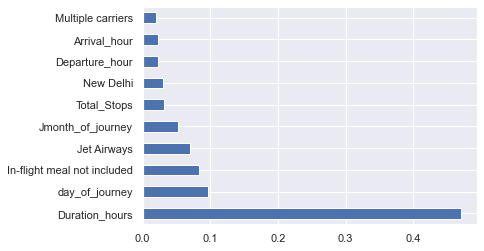

In [238]:
def feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(10).plot(kind='barh')  
    return final_df
feature_importance(X,Y)

In [239]:
train_data.dtypes

Total_Stops                       int64
Price                           float64
day_of_journey                    int64
Jmonth_of_journey                 int64
Departure_hour                    int64
Departure_min                     int64
Arrival_hour                      int64
Arrival_min                       int64
Duration_hours                    int64
Duration_mins                     int64
Air India                         uint8
GoAir                             uint8
IndiGo                            uint8
Jet Airways                       uint8
Multiple carriers                 uint8
OTHERS                            uint8
SpiceJet                          uint8
Vistara                           uint8
Chennai                           uint8
Delhi                             uint8
Kolkata                           uint8
Mumbai                            uint8
Cochin                            uint8
Delhi                             uint8
Hyderabad                         uint8


In [240]:
X.columns

Index(['Total_Stops', 'day_of_journey', 'Jmonth_of_journey', 'Departure_hour',
       'Departure_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Multiple carriers', 'OTHERS', 'SpiceJet', 'Vistara', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', '1 Short layover', '2 Long layover', 'Change airports',
       'In-flight meal not included', 'No Info',
       'No check-in baggage included', 'No info', 'Red-eye flight'],
      dtype='object')

In [241]:
final_features = ['Total_Stops', 'day_of_journey', 'Jmonth_of_journey', 'Departure_hour',
       'Departure_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Multiple carriers', 'OTHERS', 'SpiceJet', 'Vistara', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Change airports',
       'In-flight meal not included', 'No Info',
       'No check-in baggage included', 'No info']

X = X[final_features]

In [242]:
# log transformation of price and minmax scaling of dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [243]:
Y=np.log(Y)

## Fitting model using XG Boost Regression


In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [245]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
# Fitting XGBoost Regressor to the Training Set
xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = xgb.predict(X_test)

In [246]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_squared_error(y_test, predicted))
print(r2_score(y_test, predicted))

0.016107808595466285
0.9385636663386085


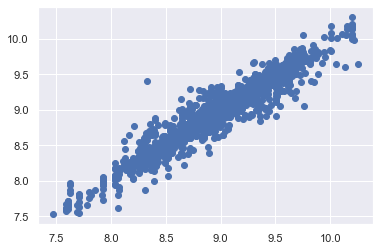

In [247]:
plt.scatter(y_test, predicted)

- Scores and graphe are good so i use xgboost for prediction on test data

# TEST-DATA

In [248]:
test_data.head()

,Total_Stops,day_of_journey,Jmonth_of_journey,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Delhi,Hyderabad,Kolkata,New Delhi,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info
0,1,12,5,15,5,20,20,5,15,0,...,0,0,0,0,0,0,0,0,0,1
1,0,15,3,18,5,21,10,3,5,1,...,0,0,0,0,0,0,0,0,0,1
2,2,24,6,11,45,4,25,16,40,0,...,0,0,0,0,0,0,0,0,0,1
3,0,21,6,9,0,11,25,2,25,0,...,0,0,0,0,0,0,0,0,0,1
4,0,27,4,14,25,16,55,2,30,0,...,0,0,0,0,0,0,0,0,0,1


In [249]:
# Checking null values
test_data.columns

Index(['Total_Stops', 'day_of_journey', 'Jmonth_of_journey', 'Departure_hour',
       'Departure_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Multiple carriers', 'OTHERS', 'SpiceJet', 'Vistara', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Business class', 'Change airports',
       'In-flight meal not included', 'No Info',
       'No check-in baggage included', 'No info'],
      dtype='object')

In [250]:
final_features

['Total_Stops',
 'day_of_journey',
 'Jmonth_of_journey',
 'Departure_hour',
 'Departure_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hours',
 'Duration_mins',
 'Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Multiple carriers',
 'OTHERS',
 'SpiceJet',
 'Vistara',
 'Chennai',
 'Delhi',
 'Kolkata',
 'Mumbai',
 'Cochin',
 'Delhi',
 'Hyderabad',
 'Kolkata',
 'New Delhi',
 'Change airports',
 'In-flight meal not included',
 'No Info',
 'No check-in baggage included',
 'No info']

In [251]:
test_data.shape

(2134, 32)

In [252]:
test_data = test_data[final_features]

In [253]:
# Min max Scaling of test_data 
test_data = scaler.fit_transform(test_data)

In [254]:
final_prediction = xgb.predict(test_data)

In [255]:
final_prediction

array([8.502406, 8.524251, 9.506663, ..., 9.167617, 9.530826, 8.677504],
      dtype=float32)

In [256]:
# Converting predicted price back and adding it too test_data
Price = np.exp(final_prediction)
Price

array([ 4926.6084,  5035.4136, 13449.044 , ...,  9581.763 , 13777.962 ,
        5869.376 ], dtype=float32)

In [258]:
Price = pd.DataFrame(Price)
Price

,0
0,4926.608398
1,5035.413574
2,13449.043945
3,2718.752686
4,3740.984863
...,...
2129,3244.191406
2130,11670.610352
2131,9581.762695
2132,13777.961914


In [259]:
filename = 'Price.csv'
Price.to_csv(filename,index=True,index_label='Id')